# Wine data clustering with k-means

### Content
The contents of this notebook involve analyzing data using visual representations, preparing the data for analysis, clustering the data using the K-means method, and displaying the results visually.

# Data Loading

### Packages & Helping Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.metrics import *
plt.style.use('seaborn')

import mlpack

Downloading the data 

In [2]:
!wget -q https://datasets.mlpack.org/wine.tar.gz

In [3]:
!tar -xvzf wine.tar.gz

wine.arff
wine.csv
wine_centroids.csv


Adding column names

In [4]:
df = pd.read_csv("wine.csv", names=["Alcohol", "Malic.acid", "Ash", "Acl", "Mg", "Phenols", "Flavanoids", "Nonflavanoid.phenols", "Proanth", "Color.int", "Hue", "OD", "Proline"])

Adding the labels column

In [5]:
df["Wine"] = 0

In [6]:
df.loc[:60, "Wine"] = 1
df.loc[61:131, "Wine"] = 2
df.loc[132:179, "Wine"] = 3
df["Wine"] = df["Wine"].astype(int)

### Understanding Data 
#### Information abouth Wine:
Malic_Acid = Malic Acid is one of the main acids found in the acidity of grapes. Its concentration decreases the more a grape ripens. Malic Acid provides a strong link to wines tasting ‘flat’ if there is not enough. If there is too much the wine will taste ‘sour’. It is vital that the levels of malic acid are monitored during the fermentation process.

Ash = Ash determination is an obligatory analysis for certified wines to be placed on the market. It is defined as all the inorganic matter remaining after igniting the residue left from the evaporation of must or wine

Ash_Alcanity = The alkalinity of the ash is defined as the sum of cations, other than the ammonium ion, combined with the organic acids in the wine

Magnesium = Magnesium cations are present in wine as a result of soil nutrient uptake in the vineyard.

Total_Phenols = The phenolic content in wine refers to the phenolic compounds—natural phenol and polyphenols—in wine, which include a large group of several hundred chemical compounds that affect the taste, color and mouthfeel of wine.

Flavonoids = Flavonoids are the main polyphenols present in red wine by weight, and constitute about 80 to 90% of total polyphenols

Nonflavanoid_Phenols = Non-flavonoid phenolics include several subclasses of importance to wine, in particular the hydroxycinnamates, stilbenes, and benzoic acids.

Proanthocyanins = Proanthocyanidins are the principal polyphenols in red wine that are under research to assess risk of coronary heart disease and lower overall mortality. With tannins, they also influence the aroma, flavor, mouth-feel and astringency of red wines.

Color_Intensity = A simple measure of how dark the wine is using a summation of absorbance measurements in the violet, green and red areas of the visible spectrum

Proline = Proline is typically the most abundant amino acid present in grape juice and wine.

In [7]:
df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### The shape of the data

In [8]:
print(f"Shape of dataset: {df.shape}")

Shape of dataset: (178, 14)


#### Columns information and description

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic.acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Acl                   178 non-null    float64
 4   Mg                    178 non-null    int64  
 5   Phenols               178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid.phenols  178 non-null    float64
 8   Proanth               178 non-null    float64
 9   Color.int             178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD                    178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Wine                  178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [10]:
df.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.915730
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.772903
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


Does the data contain any duplicates?

In [11]:
df.duplicated().sum()

0

# EDA

### Drawing Histograms for each feature

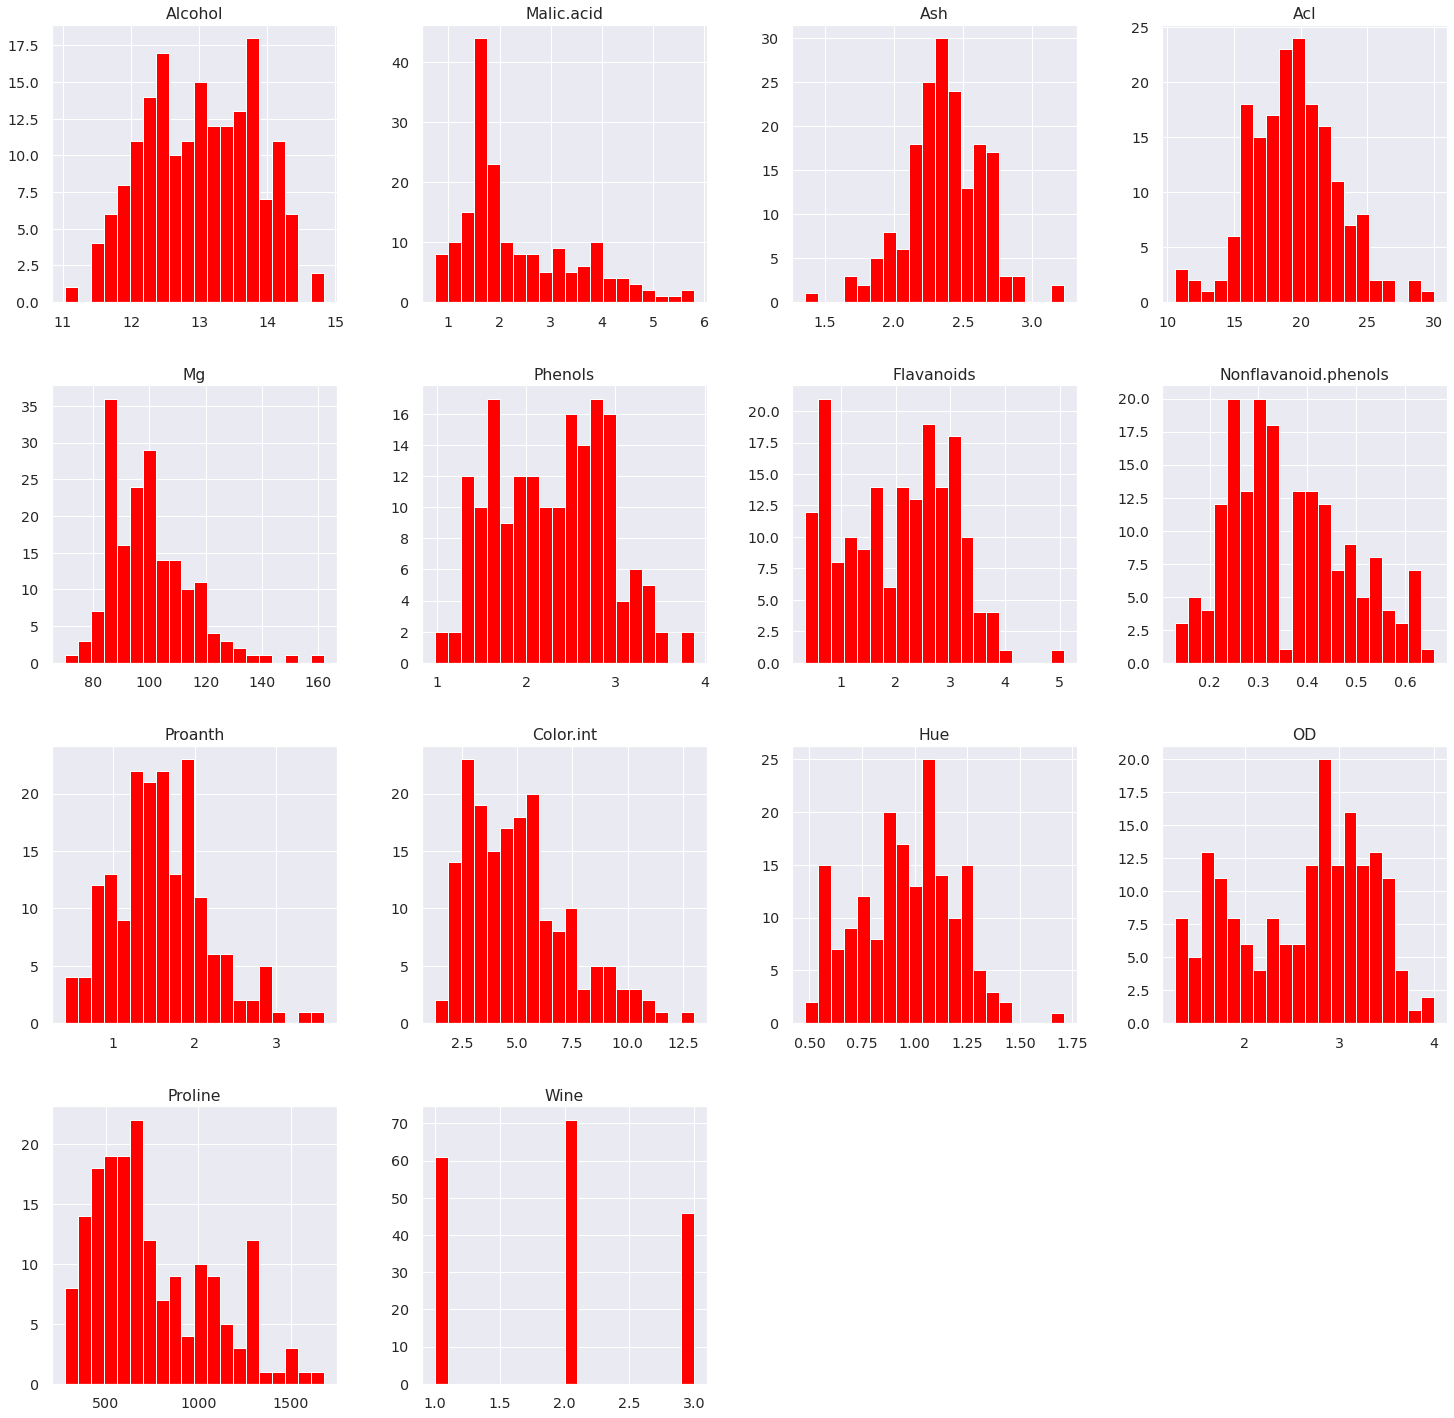

In [12]:
sns.set(style='darkgrid',font_scale=1.3, rc={'figure.figsize':(25,25)})
ax=df.hist(bins=20, color='red')

### Drawing Heatmap

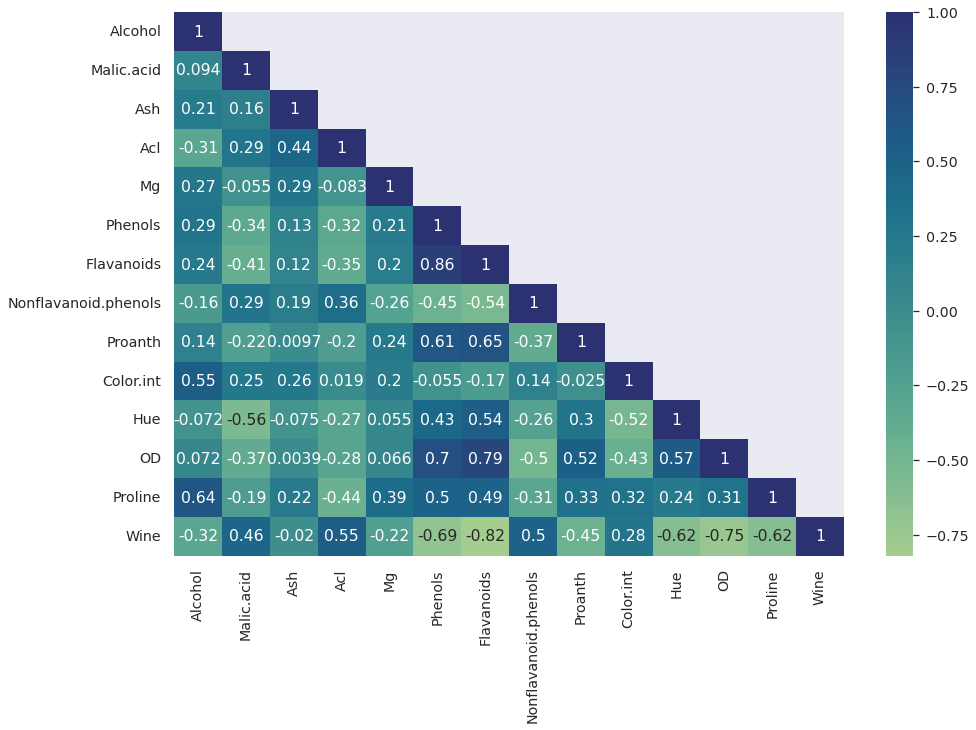

In [13]:
plt.figure(figsize=(15,10))
mask = np.triu(df.corr(),1)
sns.heatmap(df.corr(), annot=True,mask=mask, cmap="crest")
plt.show()

# Preprocessing and scaling

scalling our data

In [14]:
columns = df.columns
output = mlpack.preprocess_scale(input = df, scaler_method = 'standard_scaler')
df = pd.DataFrame(output['output'])
df.columns = columns

In [15]:
df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.188136
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.188136
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.188136
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.188136
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.188136


# Use silhouette scores method to find optimal number of clusters

In [16]:
silhouette_scores = []
Preds_list = []
for i in range(2,10):
    #Training the model
    output = mlpack.kmeans(input = df, clusters = i)
    Preds = pd.DataFrame(output['output'])
    Preds = Preds.iloc[: , -1].astype(int)
    silhouette_scores.append(silhouette_score(df, Preds.values))
    Preds_list.append(Preds)

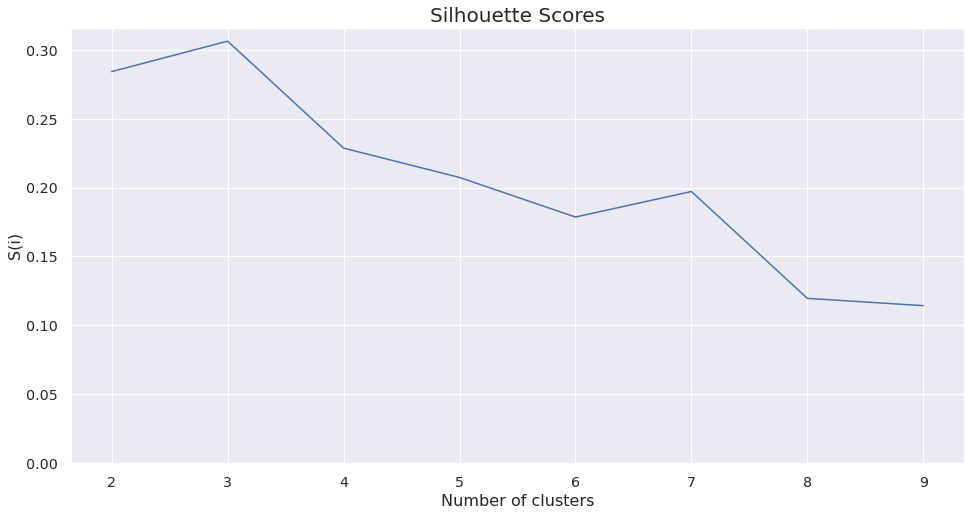

In [17]:
plt.figure(figsize=(16,8))
plt.plot(range(2,10), silhouette_scores) 
plt.ylim(ymin=0)
plt.title('Silhouette Scores', fontsize = 20)
plt.xlabel('Number of clusters', fontsize = 16) 
plt.ylabel('S(i)', fontsize = 16) 
plt.show();

As a result of constructing this graph, we see that the optimal number of clusters is 3

# K-means with 3 clusters

In [18]:
idx = silhouette_scores.index(max(silhouette_scores))
PredsFinal = Preds_list[idx]



Appending the cluster value to the main dataframe.


In [19]:
df['Cluster'] = PredsFinal

In [20]:
df.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Wine,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.188136,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.188136,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.188136,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.188136,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.188136,1


# Analysing results

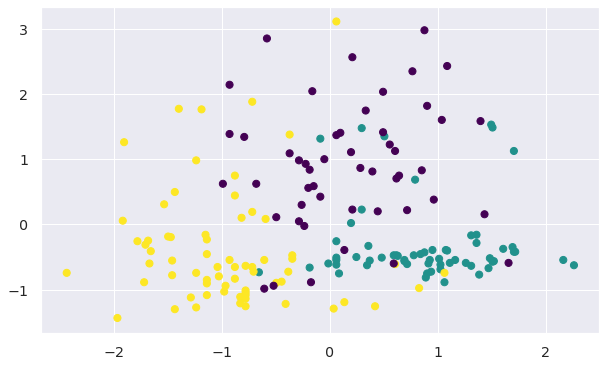

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Alcohol"], df["Malic.acid"], c=df['Cluster'], s=50, cmap='viridis')